# Home Assignment No. 1: Part 1 (Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you are asked to provide short discussion of the results. In these cases you have to create **MARKDOWN** cell with your comments right after the corresponding code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute all, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import make_moons, make_circles

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### BEGIN Your imports
import mlxtend as mx

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.random_projection import GaussianRandomProjection
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from mlxtend.plotting import plot_decision_regions
import time
### END Your imports

## Task 1. Numpy Problem 1 (1 point)

Write a function, which takes a matrix `arr` and centers each of its columns
by the mean within that column. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [2]:
def center(arr):
    """Center each column of a matrix by the mean value in that column.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the columns of which to center.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final column-centered matrix.
    """
    assert arr.ndim == 2
    n_rows, n_cols = arr.shape

    ### BEGIN Solution
    out = np.zeros((n_rows, n_cols))
    for i in range(n_cols):
        out[:,i] = arr[:,i] - arr[:,i].mean()
    ### END Solution

    return out

In [3]:
arr = np.random.rand(3,3)
for i in range(3):
    print(arr[:,i].mean())
out = center(arr)
print(arr,'\n\n', out)

0.65537955043888
0.6163955610736233
0.5079682581033086
[[0.64602671 0.94415458 0.25407261]
 [0.78061949 0.09535707 0.82545689]
 [0.53949246 0.80967503 0.44437528]] 

 [[-0.00935285  0.32775902 -0.25389565]
 [ 0.12523994 -0.52103849  0.31748863]
 [-0.11588709  0.19327947 -0.06359298]]


## Task 2. Numpy Problem 2 (1 point)

Plot the **Butterfly Curve** given by the following equation:
$$x(t)=\sin(t)\cdot\big[e^{\cos(t)}-2\cos(4t)-\sin^{5}(\frac{t}{12})\big]$$
$$y(t)=\cos(t)\cdot\big[e^{\cos(t)}-2\cos(4t)-\sin^{5}(\frac{t}{12})\big]$$
for $0\leq t\leq 12\pi$. Make sure that all the folds of the wings of different levels have different color.

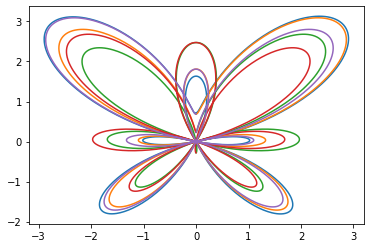

In [4]:
### BEGIN Solution
def f(t):
    return np.exp(np.cos(t)) - 2*np.cos(4*t) - np.sin(t/12)**5
for i in range(5):
    t = np.linspace(2*i*np.pi, 2*(i+1)*np.pi, 1000)
    x = np.sin(t) * f(t)
    y = np.cos(t) * f(t)
    plt.plot(x,y)
### END Solution

## Task 3. Matplotlib (2 points)

Plot the level sets of the $l^p$ norm (actually, this is not a norm for $p<1$)
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,,
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{25}, \tfrac12, 1, 1.5, 2, 7, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. We suggest to use `np.linalg.norm`.

Try to produce a plot that **looks like the one below**:

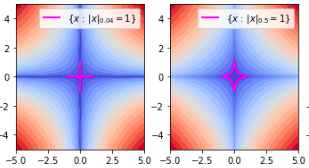

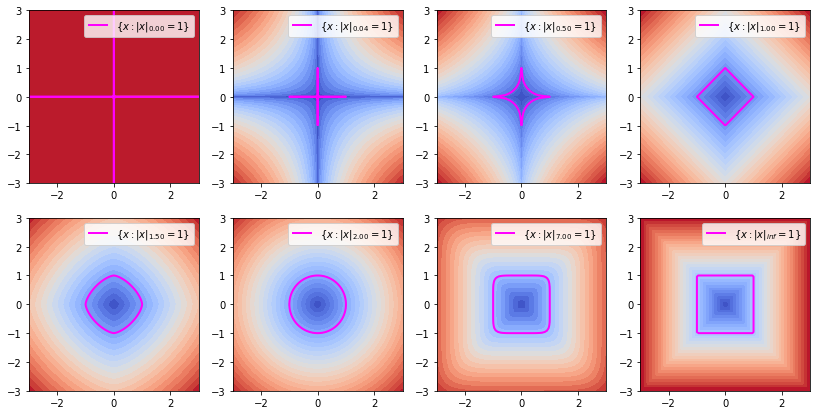

In [5]:
p_values = [0., 0.04, 0.5, 1, 1.5, 2, 7, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))

fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                         nrows=2, figsize=(14, 7))

for p, ax in zip(p_values, axes.flat):
    ### BEGIN Solution
    
    coord_paired = np.stack((xx, yy))
    legend = r'{$x: |x|_{%0.2f} = 1$}' % p  
    #norm = np.linalg.norm(np.vstack([xx.reshape(-1), yy.reshape(-1)]), axis = 0, ord = p)
    norm = np.linalg.norm(coord_paired, axis = 0, ord = p)
    plt.subplot(ax)
    plt.contourf(xx, yy, norm, 30, cmap="coolwarm")
    contour = plt.contour(xx, yy, norm, levels = [1], linewidths=2, colors='magenta')
    plt.axis('tight')
    plt.legend([contour.collections[0]], [legend], loc='best')
    ### END Solution
plt.show()

# Task 4. Decision Rules and Feature Engeneering (1+1=2 points)

In this task, your goal is to visualize the decision rules of several classifiers applied to artificial $2$-dimensional dataset generated by builtin `sklearn.datasets` method called `make_moons`. In the cell below we generate the dataset.

In [2]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise)
    if not n_sun:
        return X_moons, y_moons
    
    np.random.seed(0xBEEFBAD)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)
    
    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)
    
    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R
    
    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

### Subproblem 4.1. Decision Rule Plotting (1 of 2 points)

The goal of the subproblem is to fit the following classifiers on features `X` to target `y`:
* Decision Tree (single!) with small depth ($\leq 4$);
* Random Forest with small number of trees ($\leq 25$) of small depth ($\leq 4$);
* Logistic Regreesion;
* Support Vector Machine with RBF kernel;
* Gaussian Naive Bayes;
* k-Nearest Neighbor Classifier with small number of neighbors (e.g. $3$);

For all the fitted classifiers you have to plot the decision regions (the example is shown below the cell). Each plot must have **Title** which contains name of the classifier and its accuracy (only **two** decimal places) on the data.

You can write the plotting code on your own, but we highly recommend just to use `mlxtend` library (`pip install mlxtend` in linux terminal), which has awesome one-line decision rule plotting function (you are to [google](http://google.com) it).

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


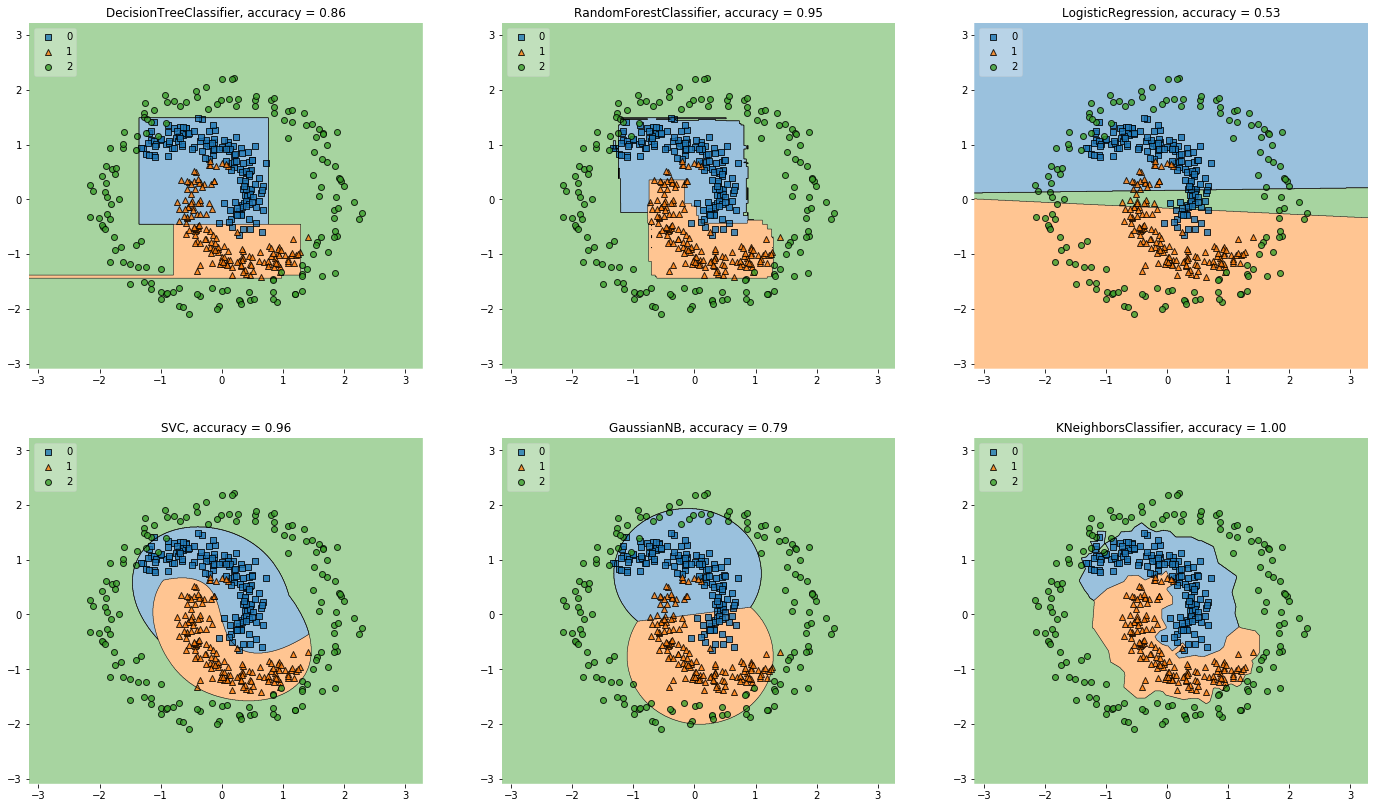

In [4]:
### BEGIN Solution
seed = 42
classifier_list = [
        DecisionTreeClassifier(max_depth=4, random_state = seed),
        RandomForestClassifier(n_estimators=25, max_depth=4, random_state = seed),
        LogisticRegression(random_state = seed),
        SVC(kernel='rbf', random_state = seed),
        GaussianNB(),
        KNeighborsClassifier(n_neighbors=3)
        ]
title_list = ["DecisionTreeClassifier", "RandomForestClassifier", "LogisticRegression", "SVC", "GaussianNB", "KNeighborsClassifier"]

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(24, 14))

for clf, ax, title in zip(classifier_list, axes.flat, title_list):
    clf.fit(X, y)
    score = accuracy_score(y, clf.predict(X))  
    plot_decision_regions(X=X, y=y, clf=clf, ax=ax, legend=2)
    ax.set_title('%s,' % title +' accuracy = %0.2f' %score)
### END Solution

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 1.0, 'ExtraTreesClassifier, accuracy = 1.00')

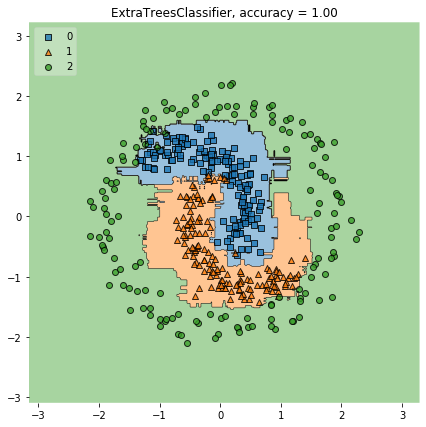

In [21]:
from sklearn.neighbors import DistanceMetric
from sklearn.ensemble import ExtraTreesClassifier
classifier_list_2 = []
title_list_2 = ["ExtraTreesClassifier"]
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 7))
clf  = ExtraTreesClassifier()
clf.fit(X, y)
score = accuracy_score(y, clf.predict(X))  
plot_decision_regions(X=X, y=y, clf=clf, ax=ax, legend=2)
ax.set_title('%s,' % title +' accuracy = %0.2f' %score)

### Subproblem 4.2. Pipeline: Fitting to Data by Feature Engeneering (1 of 2 points)
In previous task 4.1 several classifiers obviously failed fitting to data. This happend because the decision rule of the classifier has a restricted form (e.g. linear for linear models), while the data is more complicated.

One may try to change the parameters of the classifier (e.g. increase the number of trees in Forest) in order to improve accuracy, but some models (especially linear) do not have parameters that can change the form of the decision rule.

In this case the **feature engeneering** helps: one may try to compute new (e.g. non-linear) features based on the existing pool and fit the classifier in the new features. This may help low-complex classifiers to fit to hard data dependencies.

Your task it to
* Choose **two classifiers** from the previous problem among Decision Tree, Random Forest, Naive Bayes, Logistic Regression;
* By generating of additional features (e.g. polynomial) make them achieve accuracy $>0.95$.
* For each classifier, write 2-3 sentences why did you choose these features.
* Plot their decision rules in the original feature space.

It is your choice how to generate features. You may create hand-crafted featues and add them manually. Nevertheless, we **highly suggest** to get used to and apply the following builtin `sklearn` methods:
* `PolynomialFeatures`, `GaussianRandomProjection` among others - for feature generation
* `StandartScaler`, `MinMaxScaler` among others - for feature scaling
* `Pipeline` - for combining several operations in a row (e.g. feature creation & prediction)

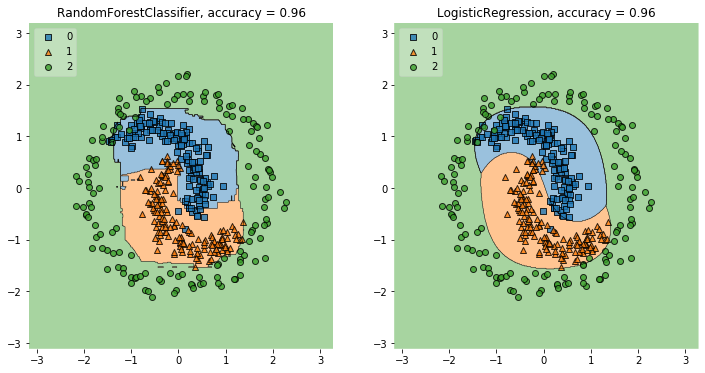

In [27]:
### BEGIN Solution
seed = 2
clf_1 = Pipeline([('scaler', StandardScaler()),
                  ('features', PolynomialFeatures(5)), 
                  ('RandomForestClassifier', RandomForestClassifier(n_estimators=25, max_depth=4, random_state = seed))])
clf_2 = Pipeline([('scaler', StandardScaler()),
                  ('features', PolynomialFeatures(4)),  
                  ('LogisticRegression', LogisticRegression(random_state = seed))])

classifier_list = [clf_1, clf_2]

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))

title_list = ['RandomForestClassifier', 'LogisticRegression']

for clf, ax, title in zip(classifier_list, axes.flat, title_list):
    clf.fit(X, y)
    score = accuracy_score(y, clf.predict(X))  
    plot_decision_regions(X=X, y=y, clf=clf, ax=ax, legend=2)
    ax.set_title('%s,' % title +' accuracy = %0.2f' %score)
### END Solution

Since our data is not separable by linear function, naive logistic regression cannot reach adequate results (we can see it from 4.1). Creating new polynomial features allows as to use corresponding polynomial functions (in our case up to the 4th degree for logistic regression) to improve separation border. These features also affect splits for tree based classifiers, so we win in both cases.

## Task 5. Model Selection (1+1 points)

You are to test Random Forests and Support Vector Machines on a trivial [Tic Tac Toe Endgame Dataset](https://datahub.io/machine-learning/tic-tac-toe-endgame). Let's load it.

In [10]:
data = pd.read_csv('data/tic-tac-toe.csv')
X, y = data.drop('class', axis=1), data['class'].astype(int)
data.sample(3)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
708,x,b,x,o,x,x,o,o,o,False
670,x,x,b,b,x,b,o,o,o,False
87,x,x,o,o,x,x,o,o,x,True


The dataset consists of several possible endgame positions of the Tic-Tac-Toe game. The target variable is the victory of `x` player over `o` player (victory or defeat/draw). Since the features are categorical, we simply transform them to real-valued $-1$ for `o`, $1$ for `x` and $0$ for emply cell `b`.

In [11]:
X = X.applymap(lambda v: 1 if v == 'x' else -1 if v == 'o' else 0)
X.sample(4).sort_index()

,TL,TM,TR,ML,MM,MR,BL,BM,BR
607,0,0,1,0,0,1,-1,-1,1
749,-1,1,1,-1,1,1,-1,-1,0
887,0,1,1,-1,-1,-1,0,1,0
912,0,1,0,-1,-1,-1,0,1,1


We are going to test how machine learning algorithms can classify the final game positions into the ones when `x` player won and all others. Everybody knows that for this problem there is a simple decision rule: `x` wins if there are three `x`'s in a row/column/diagonal. But can our cool machine learning tools catch this trivial dependence? In this problem, the class balance is around $2:1$ so we still use accuracy metric.

Intuitively, this rule is logical, i.e. one may expect decision-tree-based algorithm to be the most appropriate for this case. But is that true? In the code below we compare huge Random forest with simple Logistic Regression and SVM with default parameters.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(0xBADBEEF)
test_idx = list(np.random.choice(range(len(X)), 650, replace=False))
train_idx = [i for i in range(len(X)) if i not in test_idx]

Note that we will use only $\frac{1}{3}$ of data to train and $\frac{2}{3}$ to test the model.

In [13]:
rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=2)
svm = SVC(gamma='auto')
lr = LogisticRegression(solver='lbfgs')
clfs = (rf, svm, lr)

for clf in clfs:
    clf.fit(X.iloc[train_idx], y.iloc[train_idx])
    score = accuracy_score(y.iloc[test_idx], clf.predict(X.iloc[test_idx]))
    name = clf.__class__.__name__
    print(f'{name} scored {round(score, 3)}')

RandomForestClassifier scored 0.932
SVC scored 0.94
LogisticRegression scored 0.972


We see all the models provide reasonable quality. Yet we are not satisfied!

### Subproblem 5.1. Model selection for SVM (1 of 2 points)
Perform **Grid Search** on train set for optimal hyperparameter for SVM model in order to achieve 5-fold validation score on the data not lower than $0.98$. You can code the Grid Search Manually, but we highly encourage yo use builtin `GridSearchCV` method. **Report** the validation accuracy score, test accuracy score and best found hyper parameters. **Explain** the results: does your model overfit?

In [14]:
### BEGIN Solution
seed = 4
gamma_list = list(10**(-i-1) for i in range(4))
C_list =  [1, 10, 100, 1000, 1000]
kernel_list = ['linear', 'rbf', 'poly', 'sigmoid']

parameters = {'gamma': gamma_list, 'C' : C_list, 'kernel' : kernel_list}

clf = GridSearchCV(SVC(random_state = seed), parameters, cv = 5, refit = True)
clf.fit(X.iloc[train_idx], y.iloc[train_idx])
score = accuracy_score(y.iloc[test_idx], clf.predict(X.iloc[test_idx]))
print('Best parameters: ',clf.best_params_, 
      '\nSVM scored on CV: ', clf.best_score_, 
      '\nSVM scored on Test', score)
### END Solution

Best parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'linear'} 
SVM scored on CV:  0.9805194805194806 
SVM scored on Test 0.9846153846153847


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Our model does not overfit (test score is slightly better than train), ut means that we actually can improve results using adaptive search of best parameters of classifier.

### Subproblem 5.2. Feature engeneering for Random Forest  (1 of 2 points)
Perform **feature engeneering** for Random Forest with parameters from the example in order to achieve 5-fold validation score on train set not lower than $0.96$. **Write** 2-3 sentences to explicitly explain your motivation for provided feature choice. Fit the model on the whole train set and **provide** the test score. 

In [15]:
### BEGIN Solution
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=seed)

X['r_t'] = X[['TL', 'TM', 'TR']].sum(axis=1)
X['r_m'] = X[['ML', 'MM', 'MR']].sum(axis=1)
X['r_b'] = X[['BL', 'BM', 'BR']].sum(axis=1)
X['c_l'] = X[['TL', 'ML', 'BL']].sum(axis=1)
X['c_m'] = X[['TM', 'MM', 'BM']].sum(axis=1)
X['c_r'] = X[['TR', 'MR', 'BR']].sum(axis=1)
X['d1'] = X['TL'] + X['MM'] + X['BR']
X['d2'] = X['BL'] + X['MM'] + X['TR']


clf.fit(X.iloc[train_idx], y.iloc[train_idx])
score = cross_val_score(clf, X.iloc[test_idx], y.iloc[test_idx], cv=5)
print("RandomForestClassifier: score ", score.mean())
### END Solution

RandomForestClassifier: score  0.9846030944024908


Assuming that we all know how to play "крестики-нолики", so I can cay that idea for new featuresis absolutely natural - we will create sum of filled values from particular row or column + 2 diagonals. So it will be 8 new features. These new features will contain veru useful infirmation of current status of certain player. So we add corresponding columns in our dataframe and calculate resulting score.

## Task 6. Bagging Ensembles of Regressors (2 points)
In this problem, you are to deal with [Concrete Compressive Strength Dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set). You goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Regressors** and compare the forests. Let's load the data and split it into test and train parts.

In [16]:
data = pd.read_csv('data/concrete.csv').astype(float)
X = data.drop('concrete_compressive_strength', axis=1)
y = data.concrete_compressive_strength

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

data.sample(3).sort_index()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
317,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,56.0,44.14
546,333.0,0.0,0.0,192.0,0.0,931.2,842.6,28.0,31.97
811,310.0,0.0,0.0,192.0,0.0,970.0,850.0,28.0,27.92


Please note that both in Task 4 and Task 5 the whole data was the Train Data. In Task 4 the output score (accuracy) was the **train** score (i.e. the score on the train data of the model fitted on the same data). In task 5 the output score was the **validation score**, i.e. the result of validating the model on the train data.

In this problem, we do a step further and split the whole data into train part (on which we train & validate) and test part (where we compute the final **test** score on the validated model).

In this problem, you are to consider the `RandomForestRegressor` and `ExtraTreesRegressor` models for the prediction of concrete compressive strength under **squared loss function** (mean squared error). Recall that Random Forest was discussed in the lectures. [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is another bootstraped forest with simple tree building algorithm. Basically, each split of each tree node is chosen at random both w.r.t. feature and threshold (while in random forest the split minimizes impurity).

You have to do the following steps and answer the following questions:
* For both Forests perform the Grid Search (on the train data) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.
* For the optimal parameters output the train, validation score and the score for predicting for the test data.
* Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.
* Which of the algorithms perform better on the training set? Explain why!

In [17]:
# I am done with warnings...
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [18]:
### BEGIN Solution
n_estimators_list = [50*i for i in range(1, 12)]
max_depth_list = [i for i in range(1, 10)]
seed = 4
Regressor_list = [ExtraTreesRegressor(random_state = seed), RandomForestRegressor(random_state = seed)]

parameters = {'n_estimators': n_estimators_list, 'max_depth': max_depth_list}
title_list = ['ExtraTreesRegressor', 'RandomForestRegressor']
i = 0

for r, title in zip(Regressor_list, title_list):
    i+=1
    Grid_reg = GridSearchCV(r, parameters, scoring ='neg_mean_squared_error').fit(X_train,y_train)
    if i == 1: print("Ensemble Classifier\tTrain\tValid\tTest")
    print(title, "\t", 
          round(mean_squared_error(y_train, Grid_reg.predict(X_train)),2), "\t", 
          round(np.abs(Grid_reg.best_score_),2), "\t", 
          round(mean_squared_error(y_test, Grid_reg.predict(X_test)),2)) 

### END Solution

Ensemble Classifier	Train	Valid	Test
ExtraTreesRegressor 	 8.85 	 31.47 	 25.91
RandomForestRegressor 	 7.11 	 32.66 	 26.0


1) Most important parameters - number of estimators (actual number of trees in ensemble) and max depth (self explainatory - how deep are our trees).

2) We discussed the situation with low train score several times on seminars - we fit our model on this data, so the lower value of MSE is not surprising. The situation with test score though can be different - is shows how well the model was trained. If error of the test score is close to the train then model was trained well. If the error is much higher, then probably overfitting occurs - model is too complicated and fit train data too well. Valid score is the mean value of 5 (if we use 5-fold cv) iterations of data splitting (we split train data on 5 parts - each of this smaller parts is used by our model as test data and other parts as train data. Model does not see the test data and score is calculating base on this split strategy. So we fit here not on the whole train data and process occurs in GridSearchCV blackbox - again shows how good our model can deal with new data). In our case both test and valid score are bigger than train score.

3) ExtraTreesRegressor and RandomForestRegressor perform very similar, but first one slightly better. From cited sourse we know that extra trees regressor performs better for data with in presence of noisy features, but overall they are pretty similar in terms of accuracy. I assume that initial data is indeed not so noisy.

Extra sourse: https://www.thekerneltrip.com/statistics/random-forest-vs-extra-tree/

## Task 7. Multi-Class Classification Strategies (2 points)
In this task, you deal with multiclass classification problem for [Glass Classification Data](https://www.kaggle.com/uciml/glass). Let's load the dataset.

In [19]:
data = pd.read_csv('data/glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
79,1.51590,12.82,3.52,1.90,72.86,0.69,7.97,0.0,0.0,2
87,1.51645,13.40,3.49,1.52,72.65,0.67,8.08,0.0,0.1,2
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0,6


The features of each glass oject correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem, you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to this algorithms. More precisely, for every pair (algorithm, approach) you are to perform 5-fold cross validation on the data and output the validation score and the computation time in the **table** form. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own. 

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross validation and why? Explain
* For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without significant increase in computation time?

In [20]:
### BEGIN Solution
seed = 42
time_d_tree = []
time_r_tree = []
time_knn = []
time_lr = []

score_d_tree = []
score_r_tree = []
score_knn = []
score_lr = []

clf_list = [
    DecisionTreeClassifier(max_depth = 7, random_state = seed), 
    RandomForestClassifier(n_estimators = 10,  max_depth = 3, random_state = seed), 
    KNeighborsClassifier(n_neighbors = 5),
    LogisticRegression(random_state = seed)
    ]

title_list = ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier']
time_list = [time_d_tree, time_r_tree, time_knn ,time_lr]
score_list = [score_d_tree, score_r_tree, score_knn ,score_lr]
    
metrics = "balanced_accuracy"

for clf, time_, score_ in zip(clf_list, time_list, score_list):
    t_start_1 = time.time()  
    score_1 = cross_val_score(clf, X=X, y=y, cv=5, scoring=metrics).mean()
    delta_1  = time.time() - t_start_1
    
    score_.append(score_1)
    time_.append(delta_1)
    
    clf_2= OneVsRestClassifier(clf)
    t_start_2 = time.time()
    score_2 = cross_val_score(clf_2, X=X, y=y, cv=5, scoring=metrics).mean()
    delta_2  = time.time() - t_start_2
    
    score_.append(score_2)
    time_.append(delta_2)
    
    clf_3 = OneVsOneClassifier(clf)
    t_start_3 = time.time()
    score_3 = cross_val_score(clf_3, X=X, y=y, cv=5, scoring=metrics).mean()
    delta_3  = time.time() - t_start_3
    
    score_.append(score_3)
    time_.append(delta_3)

cross_val = {'Logistic' : score_d_tree, 'Random Forest' : score_r_tree, 'K Nearest Neighbours' : score_knn, 'Decision Tree':score_lr}    
time_table = {'Logistic' : time_d_tree, 'Random Forest' : time_r_tree, 'K Nearest Neighbours' : time_knn, 'Decision Tree':time_lr}
    
Cross_Validation_Scores = pd.DataFrame(data = cross_val, index = ['Multiclass', 'OneVsRest', 'OneVsOne'])
Training_Duration = pd.DataFrame(data = time_table, index = ['Multiclass', 'OneVsRest', 'OneVsOne'])
    
print('Cross Validation Scores')
display(Cross_Validation_Scores)
print('Training Duration (CV = 5)')
display(Training_Duration)
### END Solution

Cross Validation Scores


,Logistic,Random Forest,K Nearest Neighbours,Decision Tree
Multiclass,0.581865,0.426012,0.509405,0.440853
OneVsRest,0.526885,0.623492,0.586270,0.440853
OneVsOne,0.700198,0.611885,0.518413,0.448036


Training Duration (CV = 5)


,Logistic,Random Forest,K Nearest Neighbours,Decision Tree
Multiclass,0.015957,0.043648,0.019980,0.017987
OneVsRest,0.055851,0.225007,0.067877,0.055319
OneVsOne,0.105720,0.544717,0.222023,0.107713


1) From the description of dataset from kaggle (and from data preprocessing) we can see that data set is imbalanced, so we should choose metrics wisely. I chose balanced accuracy, because it helps to deal especially with this kind of problems. As for othe options, one can try f1_macro or recall_macro for example, results are comparable because basically they also help in this situation.

2) Score significantly increased for logistic regression .for 1vs1 strategy, the time increased as well but still remains rather okay. We also can compare other algorithms - their perfom slightly better for 1vsRest approach, but the time increased dramatically (except tradeoff for 1vsRest for random forest is better).